In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline
import matplotlib.pyplot as plt

In this quiz we'll calculate a 95% confidence interval for the mean value of 'flavanoids' from the wine dataset.

In [49]:
#1. Read in ../data/wine_dataset.csv as df
df = pd.read_csv('../data/wine_dataset.csv')

# print .info() on df for a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

/var/folders/yd/0rx8hpn96fd0480f9ndhwn_00000gn/T/ipykernel_53187/4277498267.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(x='flavanoids', data=df, ci=95)


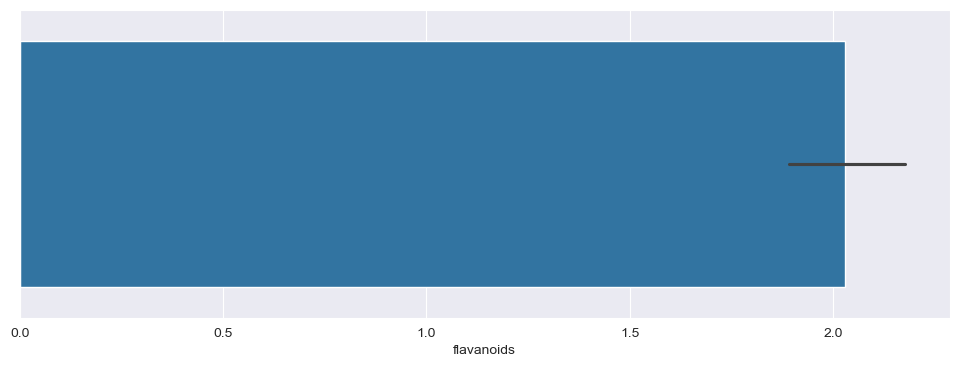

In [59]:
#2. Generate a barplot of the 'flavenoids' column with 95% confidence intervals using sns.barplot()
# These are the CI values we're going to calculate below.
# Capture the axis of the plot in ax
fig,ax = plt.subplots(1,1,figsize=(12,4))

ax = sns.barplot(x='flavanoids', data=df, ci=95)



In [60]:
#3. Assign the mean value of flavanoids to variable observed_mean
observed_mean = df.flavanoids.mean()

# Print the observed mean with a precision of 2
observed_mean.round(2)

2.03

In [61]:
# generate a bootstrap sample of df.flavanoids (with the same number of values as the original dataset)
#   using .sample() (with replacement) 
#   using random_state=0 so our answers will match
#   assign the result to sample
sample = df.flavanoids.sample(n=len(df), replace=True, random_state=0)

# Print the mean of the sample with a precision of 2
# Note: if the sample mean is the same as the observed mean, 
#       check: are you sampling with replacement?
print(f"The mean (with replacement) is {sample.mean():.2f}")

The mean (with replacement) is 2.16


In [62]:
#4. Generate 1000 additional sample means using bootstrap sampling from the 'flavanoids' column
#   each sample should have the same number of values as the original dataframe
#   sample with replacement
#   do not use random_state for this step (your results may differ from the course solution slightly)
#   store in the list sample_means
sample_means = []
for i in range(1000):
    sample = np.random.choice(df['flavanoids'], size=len(df['flavanoids']), replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Print the first 5 values in sample_means
sample_means[:5]

[1.9194382022471908,
 2.003651685393258,
 1.998370786516854,
 1.969494382022472,
 2.078820224719101]

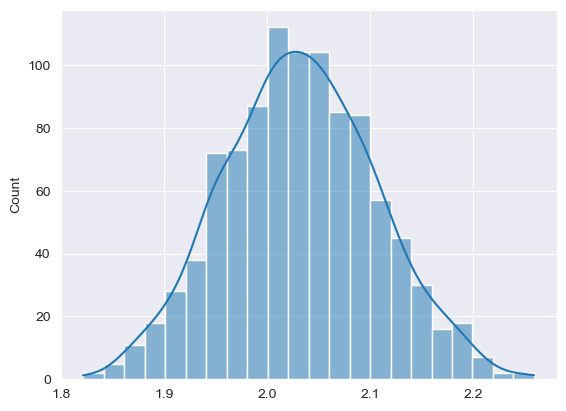

In [63]:
#5. Plot the distribution of sample means using sns.histplot()
sns = sns.histplot(sample_means, kde=True)